We will perform basic sentiment analysis on Avengers Endgame tweets dataset. And based on all the sentiments, we will
try to determine if the movie is worthy enough to watch.

In [12]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import flair
import re

In [6]:
# Cleaning the tweets
def clean(tweet):
    """
    Clean tweets using RegEx
    """
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")

    # we then use the sub method to replace anything matching
    tweet = whitespace.sub(' ', tweet)
    tweet = web_address.sub('', tweet)
    tweet = user.sub('', tweet)
    return tweet

In [8]:
# Read the dataset
df = pd.read_csv('tweets.csv', encoding='ANSI')
# df = df['text']
# Apply regex to clean the tweets
df['text'] = df['text'].apply(clean)

# Use the flair library to perform sentiment analysis
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-04-08 15:15:46,290 loading file C:\Users\nikhi\.flair\models\sentiment-en-mix-distillbert_4.pt


In [9]:
df['text'].to_numpy().shape

(15000,)

In [10]:
probs = []
sentiments = []
for twt in df['text'].tolist():
    sentence = flair.data.Sentence(twt)
    # Predict the sentiment of the tweet
    sentiment_model.predict(sentence)
    # Get the probability of the tweet
    prob = sentence.labels[0].score
    # Get the sentiment of the tweet
    sentiment = sentence.labels[0].value
    # Append the probability and sentiment to the list
    probs.append(prob)
    sentiments.append(sentiment)

df['prob'] = probs
df['sentiment'] = sentiments

In [11]:
# Print the first 5 rows of the dataframe
df[['text', 'prob', 'sentiment']].head()

,text,prob,sentiment
0,RT : literally nobody: me: #AvengersEndgame,0.999480,NEGATIVE
1,"RT : i’m emotional, sorry!! 2014 x 2019 #black...",0.997497,NEGATIVE
2,saving these bingo cards for tomorrow © #Aveng...,0.994066,POSITIVE
3,RT : Man these #AvengersEndgame ads are everyw...,0.997474,NEGATIVE
4,"RT : We salute you, ! #CaptainAmerica #Avenger...",0.992422,POSITIVE


<AxesSubplot:>

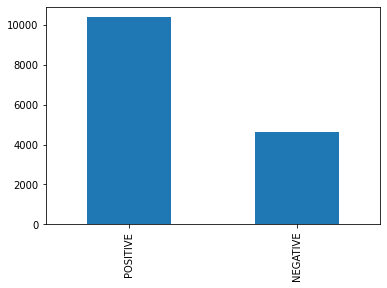

In [13]:
# Plot the histogram of the sentiments
df['sentiment'].value_counts().plot(kind='bar')

In [18]:
# Now let's take a weighted average of the probabilities
pos_df = df[df['sentiment'] == 'POSITIVE']
neg_df = df[df['sentiment'] == 'NEGATIVE']
positive_avg = pos_df['prob'].mean()
negative_avg = neg_df['prob'].mean()
weighted_avg = (pos_df.size * positive_avg - neg_df.size * negative_avg) / df.size
if weighted_avg > 0:
    print('The movie is worth watching!')
else:
    print('The movie is not worth watching!')

The movie is worth watching!


<AxesSubplot:>

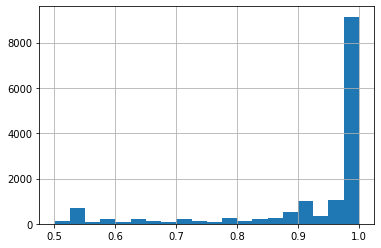

In [19]:
# Let's plot the distribution of the probabilities
df['prob'].hist(bins=20)